<img src="Images/aiwithai.png" width="100%">

## Handling missing data - Mean / Median imputation using pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# We'll use the following variables,
# 3 of which contain NA.

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [5]:
# Let's load the House Prices dataset.

data = pd.read_csv("./data/houseprice.csv", usecols=cols_to_use)
print(data.shape)

data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


**Remember that the mean or the median that we will use to replace the NA are calculated using the train set.**

In [6]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [7]:
# Find missing data

X_train.isnull().mean()

LotFrontage    0.184932
OverallQual    0.000000
MasVnrArea     0.004892
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.052838
WoodDeckSF     0.000000
dtype: float64

In [8]:
# Capture the variables to impute in a list.

vars_to_impute = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]

vars_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

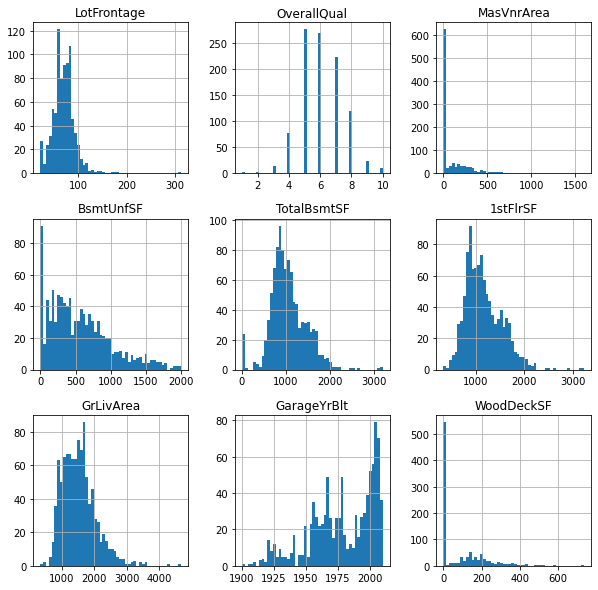

In [9]:
# Let's plot the distributions of the variables.

X_train.hist(bins=50, figsize=(10, 10))
plt.show()

In [10]:
# Capture the median of the 3 variables in
# a dictionary

imputation_dict = X_train[vars_to_impute].median().to_dict()

imputation_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1979.0}

To perform mean imputation instead of median, we just replace the previous code by: `imputation_dict = X_train[vars_to_impute].mean().to_dict()`


In [11]:
# Replace missing data

X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [12]:
# Corroborate replacement

X_train.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

In [13]:
# Corroborate replacement

X_test.isnull().sum()

LotFrontage    0
OverallQual    0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
GrLivArea      0
GarageYrBlt    0
WoodDeckSF     0
dtype: int64

## Missing category imputation - pandas

In [14]:
cols_to_use = ["BsmtQual", "FireplaceQu", "SalePrice"]

In [15]:
data = pd.read_csv("./data/houseprice.csv", usecols=cols_to_use)

data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [16]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [17]:
# Find missing data

X_train.isnull()

X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
dtype: float64

In [18]:
# Capture the imputation values in
# a dictionary

imputation_dict = {
    "BsmtQual": "Missing",
    "FireplaceQu": "Missing",
}

imputation_dict

{'BsmtQual': 'Missing', 'FireplaceQu': 'Missing'}

In [19]:
# Replace missing data

X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [20]:
# Corroborate replacement

X_train.isnull().sum()

BsmtQual       0
FireplaceQu    0
dtype: int64

In [21]:
X_test.isnull().sum()

BsmtQual       0
FireplaceQu    0
dtype: int64

In [22]:
X_train.isnull()

,BsmtQual,FireplaceQu
64,False,False
682,False,False
960,False,False
1384,False,False
1100,False,False
...,...,...
763,False,False
835,False,False
1216,False,False
559,False,False
